### 1.	Read the dataset and understand the features and target variable.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("Qualitative_Bankruptcy.data.txt",header=None)
df.head()

,0,1,2,3,4,5,6
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [3]:
df.columns=["Industrial_Risk","Management Risk","FinancialFlexibility","Credibility","Competitiveness","OperatingRisk","Class"]
df.head()
    
     

,Industrial_Risk,Management Risk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


### 2.	Encode independent features. 

In [4]:
le = LabelEncoder()
df_X=df.drop('Class',axis=1)
df_encoded=df_X.apply(le.fit_transform)
df_encoded.head()

,Industrial_Risk,Management Risk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk
0,2,2,0,0,0,2
1,1,1,0,0,0,1
2,0,0,0,0,0,0
3,2,2,2,2,2,2
4,1,1,2,2,2,1


### 3.	Separate the dependant variable from the rest of the train data .

In [5]:
Label=df.Class
Label.value_counts()

NB    143
B     107
Name: Class, dtype: int64

### 4.Split the dataset into training and test data ( Take 80:20 ratio).

In [6]:
X_train, X_test = train_test_split(
    df_encoded, test_size=0.2, random_state=1)

In [7]:
X_train.shape

(200, 6)

In [8]:
X_test.shape

(50, 6)

### 5.	Apply PCA on the independent features of train data.

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca=PCA()

In [11]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
D=pca.explained_variance_

In [13]:

var_explained = D/np.sum(D)  
cum_var_exp = np.cumsum(var_explained)  
cum_var_exp

array([0.2362834 , 0.44480696, 0.63124752, 0.76822257, 0.89462015,
       1.        ])

### 6.	Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 

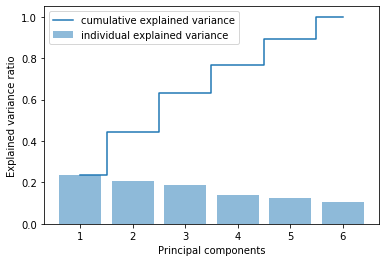

In [14]:
plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

### 7.	Transform the data using PCA ( select optimum number of PCs). 

In [15]:
pca=PCA(n_components=6)
R=pca.fit_transform(X_train-X_train.mean())

### 8.	Apply KMeans algorithm on the above transformed data. 

In [16]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(R)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,686.780000
1,2,582.625473
2,3,514.332312
3,4,463.594281
4,5,423.785651
5,6,390.200865
6,7,368.382543
7,8,346.388631
8,9,322.677213


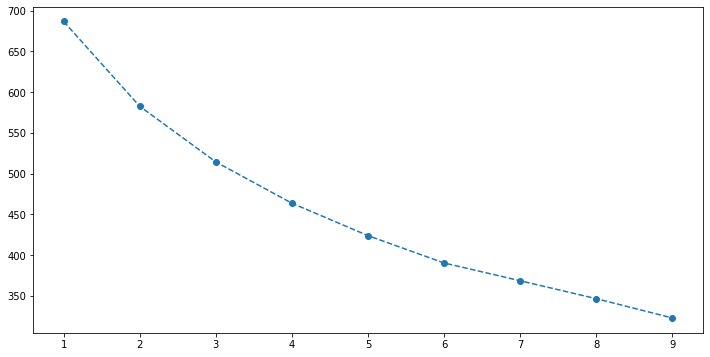

In [17]:

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,linestyle='dashed')

### 9.	Select optimal number of clusters and form clusters out of the train data. 

In [18]:
clusters = KMeans( 3, n_init = 5)
clusters.fit(R)

labels = clusters.labels_ 
labels

array([0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 0,
       1, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1,
       1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1,
       0, 0])

### 10.	Create a new column in the train data and populate it with the cluster labels. 

In [19]:
R=pd.DataFrame(R)
R["cluster_labels"]=labels
R.head(20)


,0,1,2,3,4,5,cluster_labels
0,-0.915930,0.554895,0.226071,-0.077084,0.069235,-0.816957,0
1,-0.138198,-0.100121,0.534553,-0.433352,-1.245054,-0.687951,1
2,-0.583267,-1.349621,0.631072,-0.560093,0.010619,0.111156,2
3,-0.573907,0.577348,-0.998403,-0.068991,0.122281,0.725864,0
4,0.128297,0.649811,0.638709,-0.747303,-0.464675,0.595862,1
5,1.427084,-0.373605,-0.890593,0.636143,-1.457817,0.432304,1
6,1.703643,-0.912401,0.535894,-0.897604,1.217070,0.130728,1
7,0.446767,-2.069784,0.285214,-0.322407,0.024087,-0.382911,2
8,-0.125063,0.299100,-0.751055,0.733567,-1.204330,0.219961,1
9,-1.677210,0.971805,-0.611516,0.830991,-0.950844,0.007619,0


### 11.	Transform the test data using the same PCA object that was fit on the train data. 

In [20]:

Y=pca.transform(X_test-X_test.mean())
Y

array([[-0.49942802, -0.57340921, -1.48622176,  0.44200087, -0.29114235,
        -0.41760002],
       [ 0.09857052,  0.33135243, -0.52363729,  0.18489304,  1.54740318,
         0.78692526],
       [ 0.06223625,  0.82163745,  0.72524696, -0.92914884, -0.42855197,
         0.55648991],
       [-0.45987717,  0.77417955,  0.51892813, -0.59403949, -0.16159738,
        -0.14991991],
       [ 0.2450422 , -1.09696162,  0.45580376,  1.47828911, -0.23139113,
        -0.98569361],
       [-0.16792394, -0.4185802 , -0.62779295,  0.49884409,  0.76702366,
        -0.49688777],
       [-0.55698953, -0.55859754,  0.94477035, -0.11212947, -0.18212589,
         1.52348205],
       [-0.57495726,  0.15407073, -0.15759183,  0.11995698,  0.43619044,
        -0.67660875],
       [-0.05284385,  0.20152863,  0.04872701, -0.21515237,  0.16923585,
         0.02980107],
       [-0.64932711, -1.17779446,  0.71760997, -0.74193852,  0.04674127,
         0.07178391],
       [-0.67584421,  0.34904075, -0.07561654, -0.

#### 12.	Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 

In [21]:
labels = clusters.predict(Y)
labels

array([2, 1, 1, 0, 2, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1,
       2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1,
       1, 0, 2, 2, 2, 1])

In [22]:
Y=pd.DataFrame(Y)
Y["Feature_7"]=labels
Y.head(20)


,0,1,2,3,4,5,Feature_7
0,-0.499428,-0.573409,-1.486222,0.442001,-0.291142,-0.417600,2
1,0.098571,0.331352,-0.523637,0.184893,1.547403,0.786925,1
2,0.062236,0.821637,0.725247,-0.929149,-0.428552,0.556490,1
3,-0.459877,0.774180,0.518928,-0.594039,-0.161597,-0.149920,0
4,0.245042,-1.096962,0.455804,1.478289,-0.231391,-0.985694,2
5,-0.167924,-0.418580,-0.627793,0.498844,0.767024,-0.496888,2
6,-0.556990,-0.558598,0.944770,-0.112129,-0.182126,1.523482,0
7,-0.574957,0.154071,-0.157592,0.119957,0.436190,-0.676609,0
8,-0.052844,0.201529,0.048727,-0.215152,0.169236,0.029801,1
9,-0.649327,-1.177794,0.717610,-0.741939,0.046741,0.071784,2


### 13.Apply SVC model on train dataset and predict target for test dataset. 

In [23]:
from sklearn import svm

In [24]:
clf = svm.SVC()

In [25]:
clf.fit(R.drop("cluster_labels",axis=1),R.cluster_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
predicted=clf.predict(Y.drop("Feature_7",axis=1))

### 14.	Check accuracy and confusion matrix.

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(Y["Feature_7"],predicted)

0.9

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(Y["Feature_7"],predicted)

array([[14,  1,  0],
       [ 1, 15,  1],
       [ 1,  1, 16]], dtype=int64)